/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_cases=df2_cases[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_recovered=df2_recovered[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_dead=df2_dead[df["Date"]>=start_date]


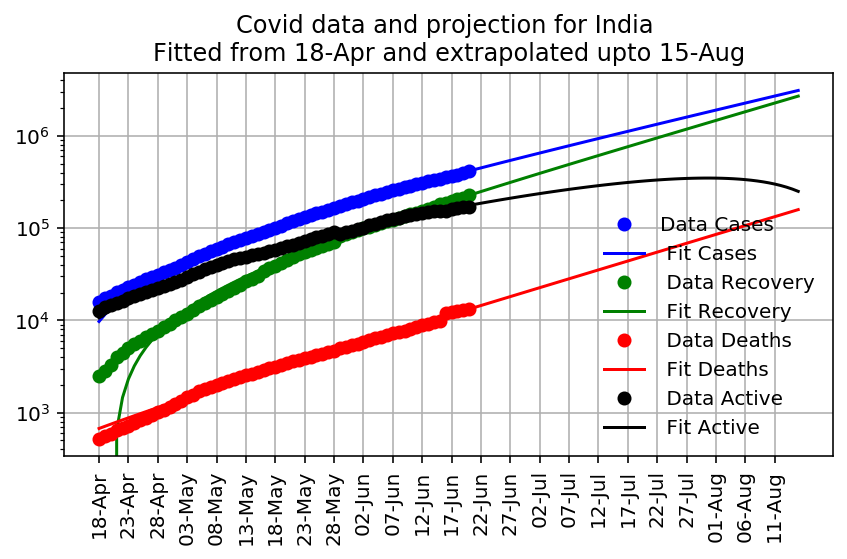

Fitting data from 18-Apr
Growth Parameters:

Cases rate:3.5
Recovery rate:4.39
Dead rate:4.51

 Fitting On Day 73 Date:30-Jun

Total Cases: 605252
Recovered Cases: 358341
Dead Cases: 20672
Active Cases: 226240


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 16:54:16 2020

@author: gururaj
"""

import numpy as np

import pandas as pd
import sys
from scipy import optimize
import matplotlib.pyplot as plt
from impfuncs import *
import io

start_day=35
end_day=120
day_max=99

dts=getDates(start_day,end_day)
dfs=populate_dfs()

x_ext_pts=range(0,end_day)
arr=load_Data(dfs,start_day=start_day,day_max=day_max)
x_pts=range(0,day_max-start_day)
[x0_cases, r_cases,delta_cases], pcov  = optimize.curve_fit(exp_growth_guru, x_pts, column(arr,2), p0=(0, 0.1,column(arr,2)[0]),method="lm")
[x0_recovered, r_recovered,delta_recovered], pcov  = optimize.curve_fit(exp_growth_guru, x_pts, column(arr,3), p0=(0, 0.1,column(arr,3)[0]),method="lm")
[x0_dead, r_dead,delta_dead], pcov  = optimize.curve_fit(exp_growth_guru, x_pts, column(arr,4), p0=(0,0.1,column(arr,4)[0]),method="lm")
    
fitted_cases = exp_growth_guru(x_ext_pts, x0_cases, r_cases,delta_cases)
fitted_recovered = exp_growth_guru(x_ext_pts, x0_recovered, r_recovered,delta_recovered)
fitted_dead = exp_growth_guru(x_ext_pts, x0_dead, r_dead,delta_dead)

fitted_active=[]
    
for i in range(len(fitted_cases)):
    act=fitted_cases[i]-(fitted_recovered[i]+fitted_dead[i])
    fitted_active.append(act)
    
    


plt.semilogy(x_pts, column(arr,2), 'bo',label="Data Cases")
plt.semilogy(fitted_cases, 'b-',label=" Fit Cases")

plt.semilogy(x_pts, column(arr,3), 'go',label=" Data Recovery")
plt.semilogy(fitted_recovered, 'g-',label=" Fit Recovery")

plt.semilogy(x_pts, column(arr,4), 'ro',label=" Data Deaths")
plt.semilogy(fitted_dead, 'r-',label=" Fit Deaths")

plt.semilogy(x_pts, column(arr,5), 'ko',label=" Data Active")
plt.semilogy(fitted_active, 'k-',label=" Fit Active")


plt.xticks(range(0,end_day,5),dts[range(0,end_day,5)])
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.title("Covid data and projection for India \nFitted from "+dts[0]+" and extrapolated upto "+dts[len(dts)-1])
plt.tight_layout()
plt.savefig("predict.png")
plt.show()

print("Fitting data from "+dts[0])
print("Growth Parameters:\n")
print("Cases rate:"+str(round(r_cases*100,2)))
print("Recovery rate:"+str(round(r_recovered*100,2)))
print("Dead rate:"+str(round(r_dead*100,2)))


t=73

#printStats(arr, dts, t)
printPredictions(fitted_cases,fitted_recovered,fitted_dead,fitted_active,dts,t)


In [3]:
printPredictions(fitted_cases,fitted_recovered,fitted_dead,fitted_active,dts,t=50)


 Fitting On Day 50 Date:02-Jun

Total Cases: 206632
Recovered Cases: 96601
Dead Cases: 5874
Active Cases: 104156
